In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import statsmodels.api as sm


# Causality and the Sequence of Events

The goal here is to construct a simple model where causality cannot be inferred
unless the sequence of events is known.

In [2]:
nsamp = 500
X_0 = 2 * np.random.rand(nsamp, 2) 
dx = lambda t, y: [0, (y[0] - 1) ** 3]
t = np.linspace(0, 0.1)
final_state = lambda x0: integrate.solve_ivp(dx, (0, 1), x0).y[:, -2]
X_1 = np.vstack([final_state(x) for x in X_0])


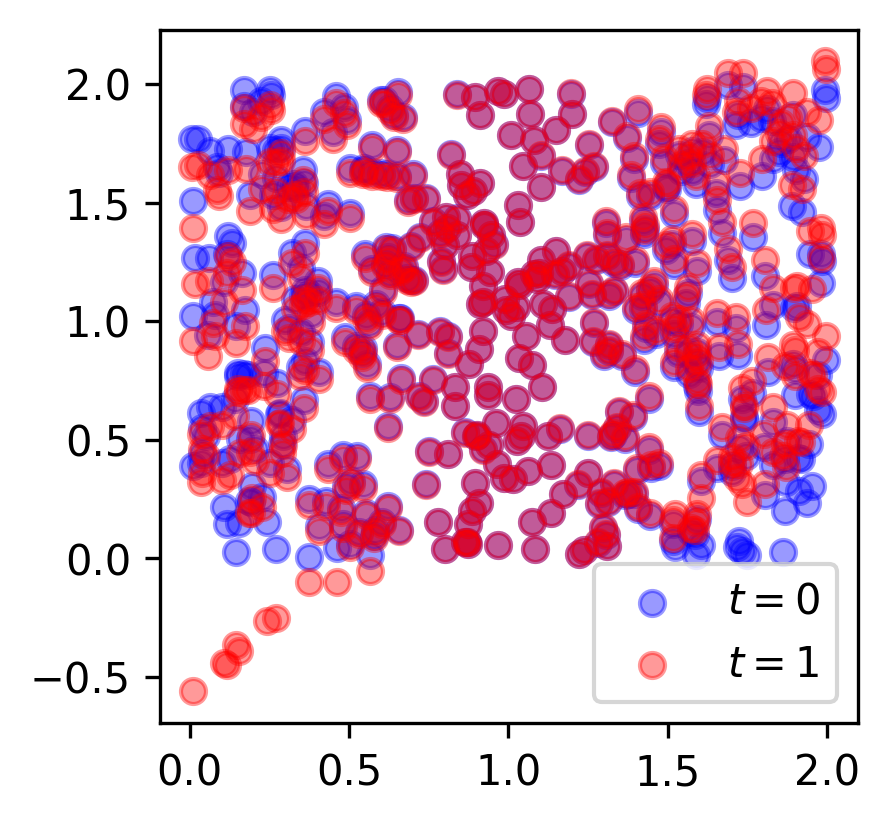

In [3]:
plt.figure(figsize=(3,3), dpi=300)
plt.scatter(X_0[:, 0], X_0[:, 1], c="b", alpha=0.4, label="$t=0$")
plt.scatter(X_1[:, 0], X_1[:, 1], c="r", alpha=0.4, label="$t=1$")
plt.legend()
plt.show()


In [4]:
X = np.vstack([
    np.hstack([X_0, np.zeros((nsamp, 1))]),
    np.hstack([X_1, np.ones((nsamp, 1))])
])
y = X[:, 1]
x = X[:, 0]
t = X[:, 2]
xt = x * t

exog = np.vstack([t]).T

mod = sm.OLS(y, sm.add_constant(exog))
res = mod.fit()

In [5]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.001847
Date:                Thu, 05 Oct 2023   Prob (F-statistic):              0.966
Time:                        16:16:11   Log-Likelihood:                -857.61
No. Observations:                1000   AIC:                             1719.
Df Residuals:                     998   BIC:                             1729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0060      0.026     39.396      0.000       0.956       1.056
x1             0.0016      0.036      0.043      0.966      -0.069       0.072
==============================================================================
Omnibus:                      202.680   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.512
Skew:                          -0.105   Prob(JB):                     5.87e-10
Kurtosis:                       2.012   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
beta = np.array([
    [0, 0],
    [-.8, 0]
])
d = 0.0
A = beta + d * np.eye(2)
sigma = 0.3

x0 = np.array([0.1, 0.1])
x = x0
N = 100
Z = []
for i in range(N):
    Z.append(x)
    x = A @ x + np.random.randn(2) * sigma

    
Z = np.vstack(Z)



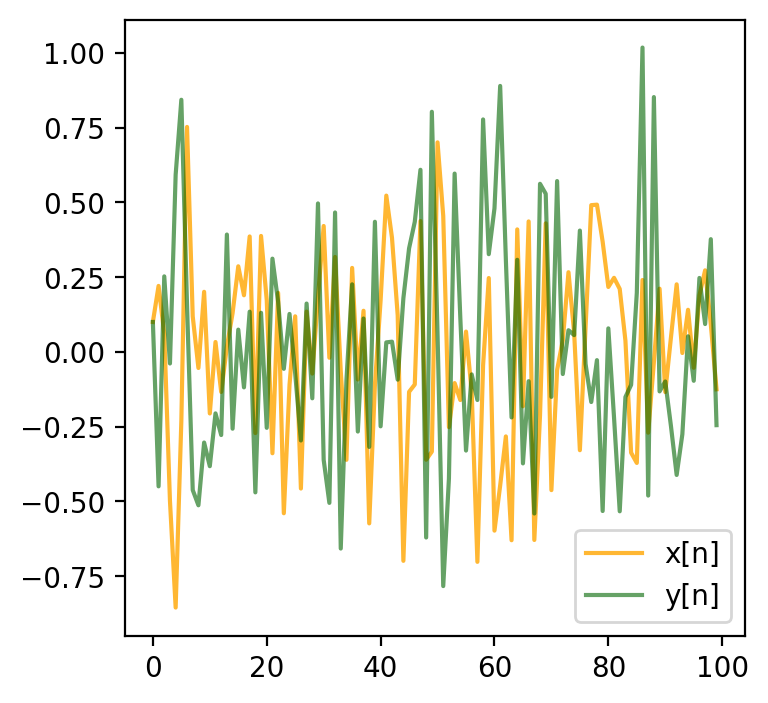

In [33]:
plt.figure(figsize=(4,4), dpi=200)
plt.plot(Z[:, 0], c="orange", alpha=0.8, label="x[n]")
plt.plot(Z[:, 1], c="darkgreen", alpha=0.6, label="y[n]")
plt.legend()
plt.show()

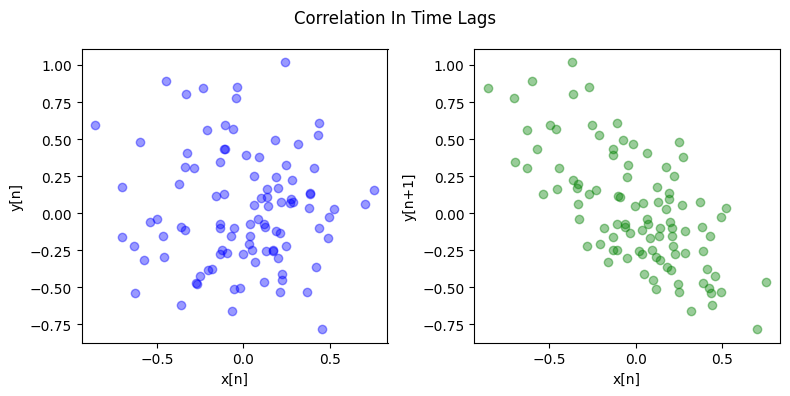

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(Z[:, 0], Z[:, 1], c="b", alpha=0.4)
ax[0].set_xlabel("x[n]")
ax[0].set_ylabel("y[n]")

ax[1].scatter(Z[:-1, 0], Z[1:, 1], c="g", alpha=0.4)
ax[1].set_xlabel("x[n]")
ax[1].set_ylabel("y[n+1]")

fig.suptitle("Correlation In Time Lags")
fig.tight_layout()


In [27]:
y = Z[:, 1]
x = Z[:, 0]
exog = sm.add_constant(x)
model = sm.OLS(y, exog)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.06853
Date:                Thu, 05 Oct 2023   Prob (F-statistic):              0.794
Time:                        16:22:19   Log-Likelihood:                -46.032
No. Observations:                 100   AIC:                             96.06
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0211      0.039      0.544      0.588      -0.056       0.098
x1            -0.0311      0.119     -0.262      0.794      -0.267       0.205
==============================================================================
Omnibus:                        3.223   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.219
Skew:                           0.405   Prob(JB):                        0.200
Kurtosis:                       2.660   Cond. No.                         3.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y = Z[1:, 1]
x = Z[:-1, 0]
exog = sm.add_constant(x)
model = sm.OLS(y, exog)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     80.42
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.27e-14
Time:                        16:20:02   Log-Likelihood:                -16.195
No. Observations:                  99   AIC:                             36.39
Df Residuals:                      97   BIC:                             41.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0211      0.029      0.729      0.468      -0.036       0.079
x1            -0.7937      0.089     -8.967      0.000      -0.969      -0.618
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.139
Skew:                           0.454   Prob(JB):                       0.0766
Kurtosis:                       2.350   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above example shows that correlation can be hidden in time lags, but can
causal relationships also be hidden?

It seems like knowing about a sequence of events should help you know if
something is causal.

Let's start with the dynamics. People drink on weekends. Heavy drinking is
associated with hangovers, but maybe hangovers don't make people unhappy, the
fact that it is Sunday makes people unhappy.

$$
P(drink| day = i) = \begin{bmatrix} 0.1 & 0.1 & 0.1 & 0.1 & 0.25 & 0.25 & 0.1 \end{bmatrix}
$$

$$
m(t) = \alpha a(t) + \beta 
$$

Conditional treatment effect after time $T$, where $F(\mathbf{x}_0, t) = x(t)$
produces the state of the system $t$ given that the initial condition was
$\mathbf{x}_0$ and $\mathbf{x}_\text{\textbf{do}}(t) = F(\mathbf{x}_0, t; \text{\textbf{do} } \mathbf{x}(t) = \mathbf{u}(t))$
gives the state of the system under some intervention described by $\mathbf{u}$.
Then the following integral describes the time averaged effect of treatment
$\mathbf{u}(t)$ on $x_i$ from $t=0$ to $t=T$ when the condition of the system at $t=0$ is $\mathbf{x}_0$:

$$
\frac{1}{T} \int_0^T x_i(s) - x_{i\text{\textbf{do}}}(s)ds = \frac{1}{T}
\int_0^T F_i(\mathbf{x}_0, s) - F_i(\mathbf{x}_0, s; \text{\textbf{do} } \mathbf{x}(t) = \mathbf{u}(t)) ds
$$



How do I pull from overleaf?

Cool stuff:

1. Cliodynamics
2. Perturbations
3. Measurement noise v.s. System noise
4. Zotero
5. Definitions of causality
6. When we move from causality in static systems to causality for dynamic systems we must define the intervention
   through time, specify the initial condition, and measure the effect over a
   specified length of time.

What should I focus on?

1. Emailing Professors. Anyone you know?
2. Learning causal inference
3. Finding and reading review papers
    1. Brainstorm keywords: Maybe open some scholar tabs together
4. Learning dynamical systems theory with noise
5. Studying methodologies -- this seems very hard
6. Making a clear case for the study of dynamics -- right now I don't have a
   clear understanding of what dynamics can do that causal inference can't do.

Imagine if I have a collection of methods with examples and
the different fields where they come from, and I have a discussion about how the
researchers used their understanding of the system of interest to
connect the real world to the method and justify the use of a particular
computational approach.

What work do you need to do in order to use your method convincingly? How can
you make convincing arguments about the structure of a system in the world.


What would be interesting experiments to start with?

Stable fixed point
Stable manifold (collection of fixed points)
Stable periodic orbit
Stable chaotic attractor 

Add linearizations of all of these systems.

